# General Optics

In [2]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'axes.labelsize': 11,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

%config InlineBackend.figure_format = 'retina'

## Ray Optics

Ray optics delivers the simplest mathematical description of light propagation, which is despite of its simplifications very powerful. However, it does not provide any insights into the physical mechanisms that govern the propagation of light. 

Geometrical or ray optics is therefore based on a number of assumptions for light propagation, i.e.

- light travels in form of rays, which are emitted by light sources and detected by detectors
- the effect of a medium on the light propagation is described by the refractive index $n=c_{0}/c$
- light takes time to travels a distance $d$ which is given by $t=d/c=nd/c_{0}$
- $n d $ therefore amounts to the optical path length

You see on these assumptions, that this is not really satisfying. We do neither really know what is propagation with the speed of light, nor where the refractive index comes from. This is something we need to address later, when we consider electromagnetic waves.

Based on this, we also can only infer from observations the laws that govern ray optics, i.e. the law of reflection and refraction. 

### Law of reflection

| <center> <img src="law_of_reflection.png" width="300"/> </center> |
|:-:|
| **Figure 1:** Law of reflection |

The law of reflection is the simplest one. It states, that the angle of incidence and the angle of reflection are always equal.

\begin{equation}
\theta_{1}=\theta_{3}
\end{equation}



### Law of refraction

| <center> <img src="law_of_refraction.png" width="300"/> </center> |
|:-:|
| **Figure 1:** Law of refraction |

\begin{equation}
n_{1}\sin(\theta_{1})=n_{2}\sin(\theta_{2})
\end{equation}

The law of refraction is known as Snell's law and relates the incident angle $\theta_1$ with the angle of the refracted ray $\theta_2$.

With this law of refraction, there are a number of special situations, that occur. This is for example the total internal refraction. You can explore different situations with the short program below which gives you control over the refractive indices and the incident angles. 

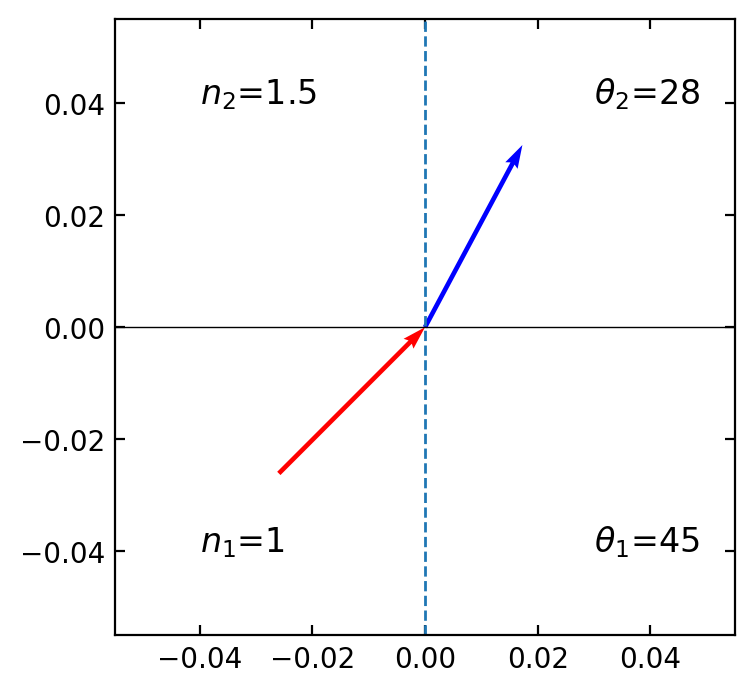

In [121]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.canvas.header_visible = False
 
#@widgets.interact(n1=(1,2,0.01),n2=(1,3,0.01), angle=(0, 90, 0.1))
def update(n1=1,n2=1.5,angle=45):
    """Remove old lines from plot and plot new one"""
    ax.cla()
    theta1=angle*np.pi/180
    if n1*np.sin(theta1)/n2<=1:
        theta2=np.arcsin(n1*np.sin(theta1)/n2)
    else:
        theta2=-theta1+np.pi
    #ax.set_title("Refraction Explorer")    
    ax.axvline(x=0,ls='--')
    ax.text(-0.04,0.04,r'$n_2$={}'.format(n2))
    ax.text(-0.04,-0.04,r'$n_1$={}'.format(n1))
    ax.text(0.03,0.04,r'$\theta_2$={}'.format(round(theta2*180/np.pi),1))
    ax.text(0.03,-0.04,r'$\theta_1$={}'.format(round(theta1*180/np.pi),1))


    ax.axhline(y=0,color='k',lw=0.5)
    ax.quiver(0,0,np.sin(theta1),np.cos(theta1),scale=3,pivot='tip' ,color='red')
    ax.quiver(0,0,np.sin(theta2),np.cos(theta2),scale=3,color='blue')
    
update()

#### Refraction on spherical boundary

Many of the interesting situations of refraction occur on interfaces, which are curved. Lenses, for example, have curved surfaces and the angles of refraction therefore change depending on the position. We can model in the simplest case by a spherical surface or in 2D just by a circular interface. The diagram below shows the definition of such a situation.

| <center> <img src="refraction_spherical.png" width="500"/> </center> |
|:-:|
| **Figure 1:** Refraction at a spherical surface |

According to the drawing we have the following relation

\begin{equation}-\theta_2+(\pi-\alpha)+\delta=\pi
\end{equation}

which results in 

\begin{equation}
-\theta_2+\pi-\alpha+\delta=\pi
\end{equation}

and finally 

\begin{equation}
\delta=\alpha+\theta_2
\end{equation}

Note that we have used a minus sign in front of $\theta_2$ in the drawing and the equations. The reason for this is tha fact that we have a different turning direction for $\theta_1$ and $\theta_2$. If we define a positive sense for $\theta_1$ then $\theta_2$ must be negative.
We further can identify the following relations for the angles $\alpha$, $\theta_1$ and $\theta_2$

\begin{equation}
\sin(\alpha)=\frac y R,\, \tan(\theta_2)=\frac{y}{z_2},\, \tan(\theta_1)=\frac{y}{z_1}
\end{equation}

from the radius of curvature of the spherical surface $R$, the distance $y$ where the ray hits the spherical surface and the object point and image point distance $z_1$ and $z_2$.

\begin{equation}
n_1\sin(\alpha+\theta_1)=n_2\sin(\alpha+\theta_2)
\end{equation}

This is a nonlinear equation and difficult to solve. Yet we can just linearize the angular functions just by assuming that all angles are small. This approximation is called the **paraxial approximation** and very important in optics. It not only means that the angle are small, but also that the light rays propagate close to the optical axis. 

Using the linearization: $\sin(x)\approx x$ we now obtain

\begin{equation}
n_1(\alpha+\theta_1)=n_2(\alpha-\theta_2)
\end{equation}

Expanding the brackets leads to
\begin{equation}
n_1\alpha+n_1\theta_1=n_2\alpha-n_2\theta_2
\end{equation}

which we can transform into 

\begin{equation}
n_2\theta_2=(n_1-n_2)\alpha+n_1\theta_1
\end{equation}

to finally obtain

\begin{equation}
\theta_2=-\frac{n_2-n_1}{n_2}\alpha+\frac{n_1}{n_2}\theta_1
\end{equation}

There is still the angle $\alpha$ we can remove by inserting the corresponding relations we have noted on the top. This leads to 

\begin{equation}
\theta_2\approx \frac{n_1}{n_2}\theta_1-\frac{n_2-n_1}{n_2R}y
\end{equation}

#### Conjugated Planes

The importance of the result above can be seen when sending two different rays from a point $P_1$ on the objects side and see where the meet on the other side. Consider the following drawing:


| <center> <img src="conjugated_planes.png" width="500"/> </center> |
|:-:|
| **Figure 3:** Refraction at a spherical surface |

In this drawing, we have two different ray which take a different path. Lets assume, the refractive index on both sides is not so much different such that:

\begin{equation}
\frac{\Delta y}{z_2}=\frac{y}{z_1}
\end{equation}

We can then use two ray with different input, e.g., $\theta_1=0$ for the first ray and $y=0$ for the second ray. Thus the right side of the formula we derived above is either zero for the first or the second term.

\begin{equation}
\textrm{ray} (1)\quad \theta_1=0 \quad \Rightarrow \quad \theta_2^1=-\frac{n_2-n_1}{n_2 R}y, \quad \tan \theta_2^{1}=\frac{\Delta y+y}{z_2}
\end{equation}

\begin{equation}
\frac{\Delta y+y}{z_2}=-\frac{n_2-n_1}{n_2R}y
\end{equation}

\begin{equation}
\textrm{ray} (2) \quad y=0 \quad \quad n_2 \theta_2^2=n_1\theta_1^2
\end{equation}

from which follows 

\begin{equation}
\Delta y =\frac{z_2}{z_1}\frac{n_1}{n_2}y
\end{equation}

which we can insert for $\Delta y$ in 

\begin{equation}
\Delta y+y=-\frac{n_2-n_1}{n_2R}yz_2
\end{equation}

to obtain

\begin{equation}
y\left(\frac{z_2}{z_1}+1\right)=-\frac{n_2-n_1}{n_2R}z_2y
\end{equation}

which gives

\begin{equation}
\left(\frac{z_2}{z_1}+1\right)=-\frac{n_2-n_1}{n_2R}z_2
\end{equation}

and thus finally

\begin{equation}
\frac{1}{z_1}+\frac{1}{z_2}=-\frac{n_2-n_1}{n_2R}
\end{equation}

The latter equation is actually already at the level of a single spherical surface showing, that all points from a plane at the location $z_1$ is imaged to points in a plane $z_2$. There is no dependence on the position $y$ where the rays hit the spherical surface. The two planes are called **conjugated planes**. They belong together and form the foundation of imaging. 


#### Biconvex Lens

We can now take the equation for a single spherical surface and derive an expression for two spherical surfaces, which form a lens. 

\begin{equation}
\theta_2=\frac{n_1}{n_2}\theta_1-\frac{n_2-n_1}{n_2R}y
\end{equation}


| <center> <img src="lens_surface1.png" width="400"/> </center> | <center> <img src="lens_surface2.png" width="400"/> </center> |
|:-:|:-|
| **Figure 4:** For th refraction at two spherical boundaries, we would have to  |

first refraction, $n_1=1, n_2=n$

\begin{equation}
\theta_t=\frac 1 n \theta_1-\frac{n-1}{nR_1}y
\end{equation}

second refraction, $n_1=n, n_2=1$



\begin{equation}
\theta_t \rightarrow \theta_1, y \rightarrow y
\end{equation}

\begin{equation}
\theta_2=\frac n 1 \theta_t-\frac{1-n}{R_2}y
\end{equation}

\begin{equation}
\theta_2=\frac n 1 \left(\frac 1 n \theta_1-\frac{n-1}{nR_1} y\right)-\frac{1-n}{R_2}y
\end{equation}

\begin{equation}
\theta_2=\theta_1-\frac{n-1}{R_1}y-\frac{1-n}{R_2}y=\theta_1-\left(\frac{n-1}{R_1}+\frac{1-n}{R_2}\right)y
\end{equation}

\begin{equation}
\frac{n-1}{R_1}+\frac{1-n}{R_2}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)=\frac 1 f
\end{equation}

lens maker equation, it tells what radii to use if you want to make a lens with $f$

\begin{equation}
\theta_2=\theta_1-\frac y f
\end{equation}

\begin{equation}
\theta_2=\frac{y}{z_2},\quad \theta_1=\frac{y}{z_1}
\end{equation}

\begin{equation}
\frac{y}{z_2}=\frac{y}{z_1}-\frac y f \quad \Rightarrow \quad \frac{1}{z_1}+\frac{1}{z_2}=\frac 1 f
\end{equation}

flipped the sign of one $z$ since it is going to the other direction


\begin{equation}
y_2=-\frac{z_2}{z_1}y_1
\end{equation}

magnification.



## Aberrations


**Spherical Aberration**

The linearization we did with the angular functions comes at a cost. The spherical shape is only a good optical surface if we have incident rays that are incident under small angles. At larger angles the sine function is not anymore well represented by a linear function and the paraxial approximation gets increasing bad.

\begin{equation}
\sin(x)\approx x-\frac{x^3}{6}+\frac{x^5}{120}+ \dots
\end{equation}

The plot below shows the accuracy of the linear and the cubic approximation.

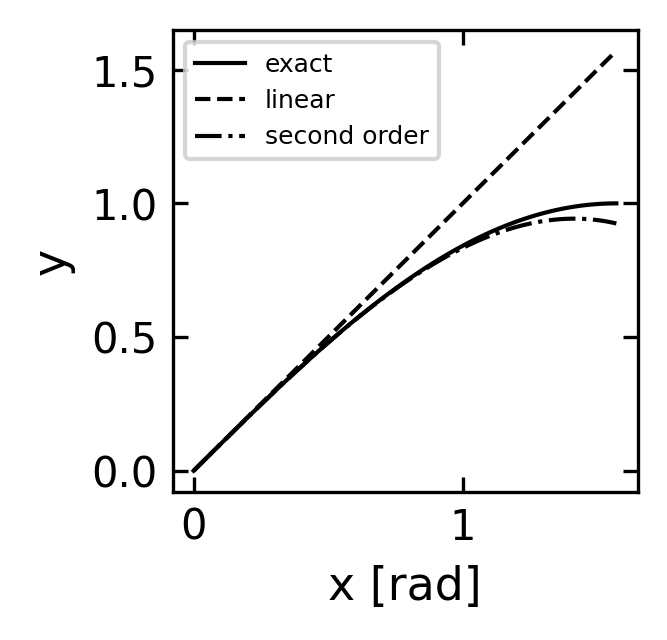

In [130]:
plt.figure(figsize=(2,2),dpi=150)
x=np.linspace(0,np.pi/2,100)
plt.plot(x,np.sin(x),"k",label="exact")
plt.plot(x,x,"k--",label="linear")
plt.plot(x,x-x**3/6,"k-.",label="second order")
plt.legend(fontsize=6)
plt.xlabel("x [rad]")
plt.ylabel("y")
plt.show()

The linear approximation is only good when

\begin{equation}
\frac{x^3}{6} \ll x \quad \rm{or} \quad \frac{x^2}{6} \ll 1 \quad \rm{or} \quad x \ll 0.4\:\:\rm{in~radians}
\end{equation}

According to that all angles should be below about $23^{\circ}$ for the paraxial apprimation to work nicely. This is not true for microscopy lenses, for example, there we have angles up to $80^{\circ}$. The approximation is then not wrong, but just not accurate enough to describe ray propagation.


| <center> <img src="spherical_aberrations.png" width="400"/> </center> |
|:-:|
| **Figure 4:** Spherical aberrations at a spherical lens. Rays the are incident far away from the optical axis are refracted more than rays close to the optical axis due to the spherical shape of the surface.  |

### Aberration Characterization and Zernike Polynomials

The Zernike polynomials are a set of orthonormal polynomials that are widely used in optics to describe wavefronts and to characterize optical aberrations. As we did not discuss wavefronts and waves yet, this is a more advanced topic here and only for information. Zernike polynomials are defined over the unit disk and are particularly useful because they are orthogonal under the inner product, which involves integration over the unit circle. This makes them suitable for decomposing a wavefront into a sum of orthogonal modes, each representing a different type of aberration.

The general form of the Zernike polynomials can be expressed in polar coordinates $$(\rho, \phi)$$, where $$\rho$$ is the radial distance from the origin (normalized to the unit circle) and $$\phi$$ is the azimuthal angle. The Zernike polynomials are defined as:

$$
Z_n^m(\rho, \phi) = 
\begin{cases} 
R_n^m(\rho) \cos(m\phi) & \text{for } m \geq 0 \\
R_n^{|m|}(\rho) \sin(|m|\phi) & \text{for } m < 0
\end{cases}
$$

where $$n$$ is a non-negative integer, $$m$$ is an integer such that $$n - |m|$$ is even and $$0 \leq |m| \leq n$$, and $$R_n^m(\rho)$$ is the radial polynomial given by:

$$
R_n^m(\rho) = \sum_{k=0}^{\frac{n-m}{2}} \frac{(-1)^k (n-k)!}{k! \left(\frac{n+m}{2} - k\right)! \left(\frac{n-m}{2} - k\right)!} \rho^{n-2k}
$$

The radial polynomials $$R_n^m(\rho)$$ are only dependent on the radial distance $$\rho$$, and they modulate the angular functions $$\cos(m\phi)$$ and $$\sin(|m|\phi)$$ that describe the azimuthal variation of the wavefront.

The Zernike polynomials are indexed in several ways, with one common method being the Noll index, which provides a single index $$j$$ to each polynomial. Another method uses the pair $$(n, m)$$ to index the polynomials, where $$n$$ indicates the order of the polynomial and $$m$$ its azimuthal frequency.

These polynomials are particularly useful in optics and ophthalmology for describing the shape of optical wavefronts and the aberrations of optical systems, including the human eye. They allow for the decomposition of a complex wavefront into simpler, orthogonal components, each corresponding to a specific type of aberration, such as defocus, astigmatism, coma, etc.

The plots below visualize the Zernike Polynomials up to a certain order.

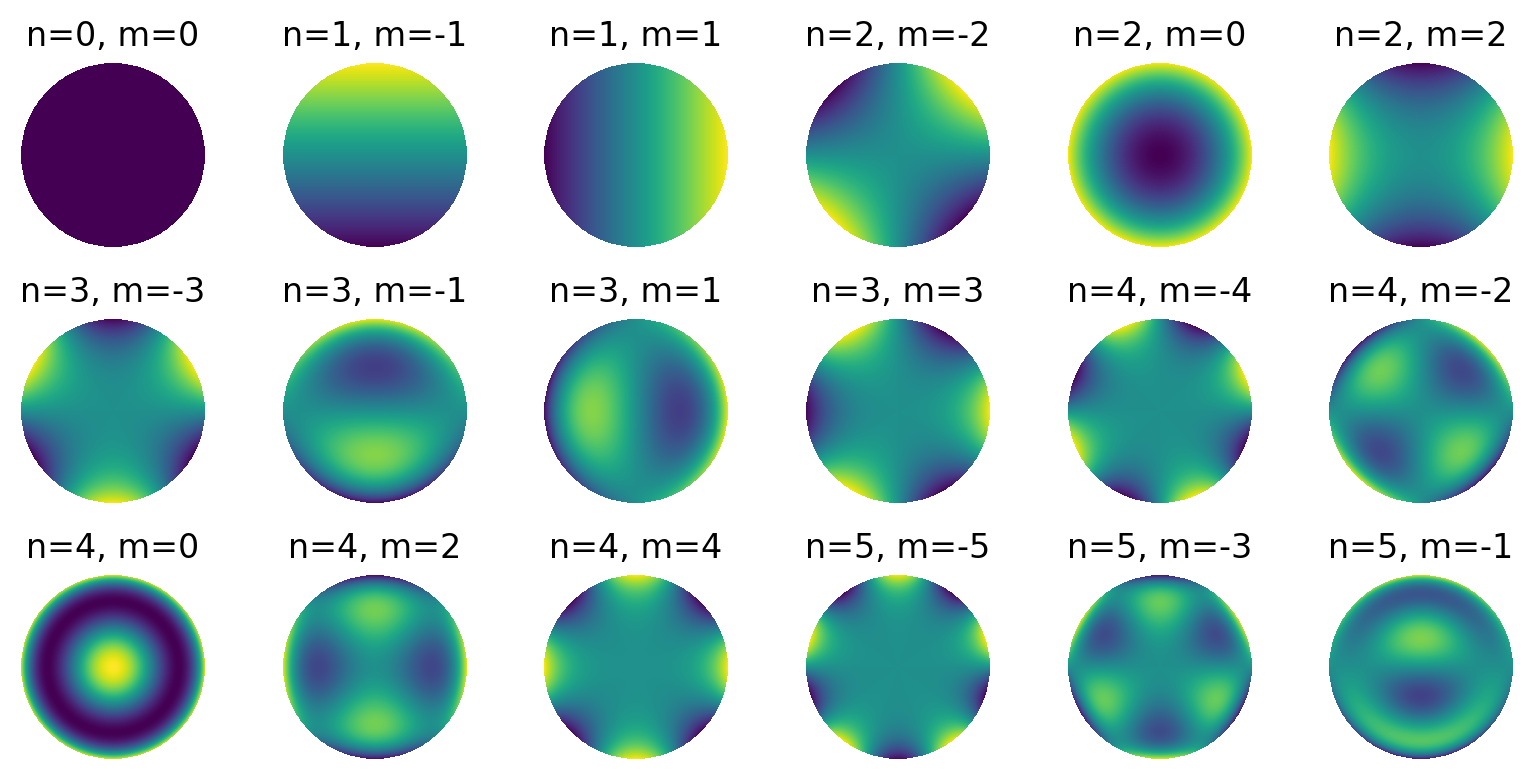

In [3]:
def radial_polynomial(n, m, rho):
    """
    Compute the radial component of the Zernike polynomial.
    """
    R = np.zeros_like(rho)
    for k in range((n - abs(m)) // 2 + 1):
        R += ((-1)**k * np.math.factorial(n - k) /
              (np.math.factorial(k) * np.math.factorial((n + abs(m)) // 2 - k) *
               np.math.factorial((n - abs(m)) // 2 - k))) * rho**(n - 2*k)
    return R

def zernike_polynomial(n, m, rho, phi):
    """
    Compute the Zernike polynomial.
    """
    if m >= 0:
        return radial_polynomial(n, m, rho) * np.cos(m * phi)
    else:
        return radial_polynomial(n, -m, rho) * np.sin(-m * phi)

x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
xx, yy = np.meshgrid(x, y)
rho = np.sqrt(xx**2 + yy**2)
phi = np.arctan2(yy, xx)

mask = rho > 1
rho[mask] = np.nan

fig, axs = plt.subplots(3, 6, figsize=(8, 4))
axs = axs.flatten()

index = 0
for n in range(6):
    for m in range(-n, n+1, 2):
        if index >= len(axs): 
            break
        Z = zernike_polynomial(n, m, rho, phi)
        Z[mask] = np.nan  # Apply mask
        ax = axs[index]
        c = ax.imshow(Z, extent=(-1, 1, -1, 1), origin='lower')
        ax.set_title(f'n={n}, m={m}')
        ax.axis('off')
        index += 1
    
plt.tight_layout()
plt.show()